In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, validation_curve
from matplotlib import pyplot as pp

In [2]:
df = pd.read_csv("data/water_potability.csv")
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
rforest = RandomForestRegressor(n_estimators=100, n_jobs=12)

train_sizes, train_scores, validation_scores = learning_curve(rforest, X, y)
validation_scores

array([[-0.62620135, -0.75316371, -0.44655283, -0.46628129, -0.75395219],
       [-0.11171169, -0.32755913, -0.46426587, -0.30166652, -0.22662725],
       [-0.1954046 , -0.15824835, -0.13266765, -0.15949252, -0.10119163],
       [-0.09999446, -0.17374411, -0.02737045, -0.03844318,  0.05537187],
       [-0.15763996, -0.11624098,  0.04827475, -0.04392895,  0.03862067]])

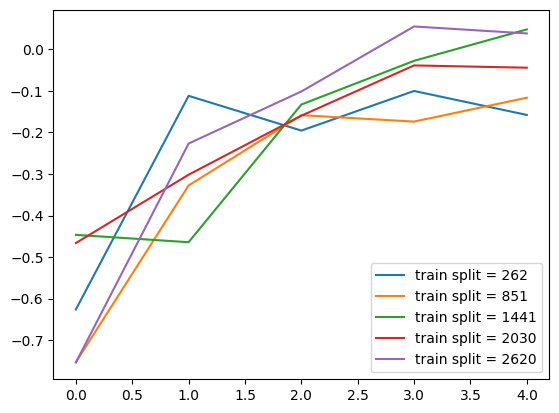

In [34]:
axes = pp.plot(validation_scores)
for i, ax in enumerate(axes):
    ax.set_label(f"train split = {train_sizes[i] :.0f}")

pp.legend()